In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kagg

In [2]:
import numpy as np 
import pandas as pd 
from IPython.display import Markdown
from datetime import timedelta
import json, requests
from datetime import datetime
import glob
import requests 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
from plotly.offline import init_notebook_mode, iplot 
import plotly.offline as py
import plotly.express as ex
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
plt.style.use("seaborn-talk")
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'
from fbprophet import Prophet
pd.set_option('display.max_rows', None)
from math import sin, cos, sqrt, atan2, radians
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Exploratory Data Analysis

## Weekly Trends of Covid cases 

In [3]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure()

data = pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv')
d1 = data.melt(id_vars="Date",value_vars=['Deaths','Cured','Confirmed'], var_name='Case',value_name='Count')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=1000, height=700)
fig=px.area(d1, x="Date", y="Count",color='Case',
              title='Weekly Trend',color_discrete_sequence = px.colors.sequential.Plasma_r)
fig.show()

## States with highest Covid Spread

(-0.5, 479.5, 479.5, -0.5)

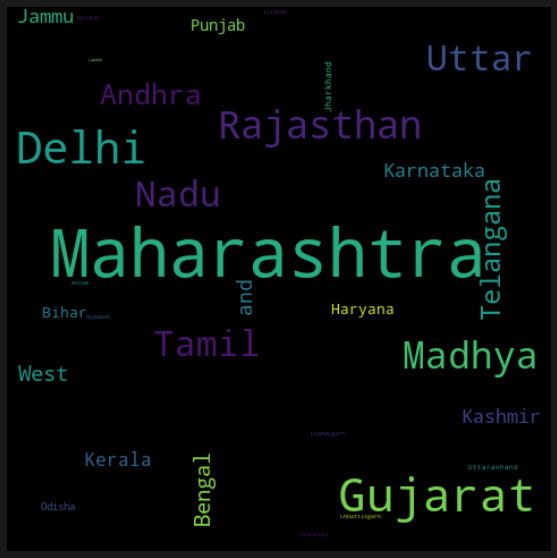

In [4]:
states = pd.read_csv('/kaggle/input/covid19-in-india/IndividualDetails.csv', usecols=['detected_state'])
STOPWORDS= ["Pradesh"]
# Create and generate a word cloud image:
wordcloud = WordCloud(width=480, height=480,margin=0,
                          stopwords=STOPWORDS, collocations=False
).generate(' '.join(states['detected_state']))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.tight_layout(pad=0)
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

## Symptoms


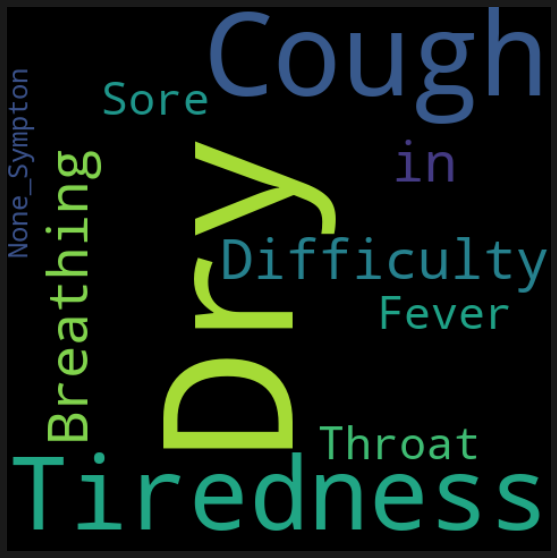

In [5]:
symptoms = pd.read_csv('/kaggle/input/covid19-symptoms-checker/Raw-Data.csv', usecols=['Symptoms'])

# Create and generate a word cloud image:
wordcloud = WordCloud(width=480, height=480,margin=0,
                          stopwords=STOPWORDS, collocations=False
).generate(' '.join(symptoms['Symptoms']))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Top 20 Cities by highest number of cases

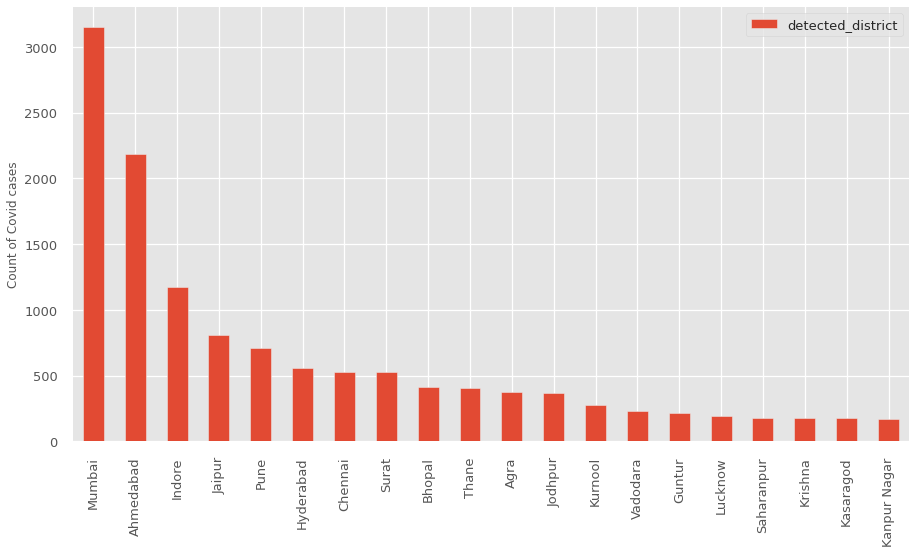

In [6]:
dist_src = pd.read_csv('/kaggle/input/covid19-in-india/IndividualDetails.csv')
dist = dist_src['detected_district']
plt.style.use('ggplot')
dist.value_counts(ascending=False).nlargest(20).plot(kind='bar', figsize=(15,8))
plt.ylabel('Count of Covid cases')
plt.legend()

## Source of Infection

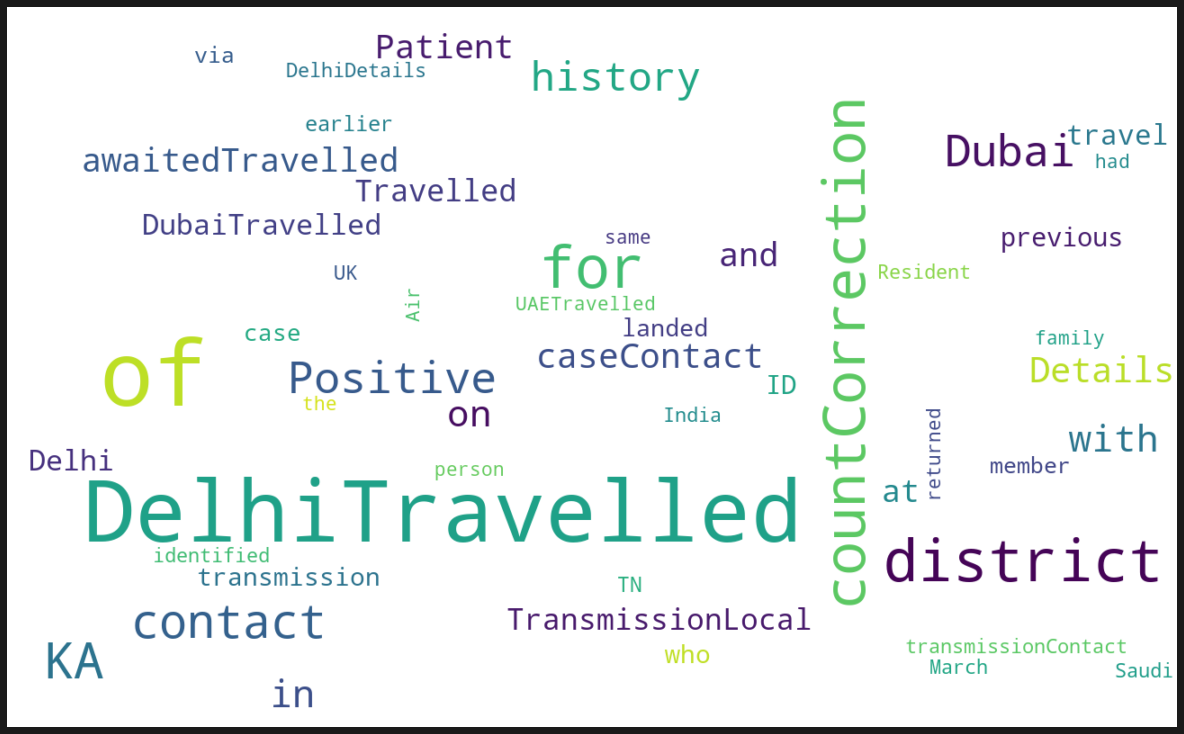

In [7]:
data_s = pd.read_csv('/kaggle/input/covid19-in-india/IndividualDetails.csv')
src=data_s['notes']
src = src.dropna()
STOPWORDS = ["awaitedDetails", "awaited", "*Travelled*", "to", "awaitedContact", "from"]
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white", width=1300, height=800,
                          stopwords = STOPWORDS, collocations=False
).generate(''.join(src))

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show() 
 



## Covid Tests performed by States

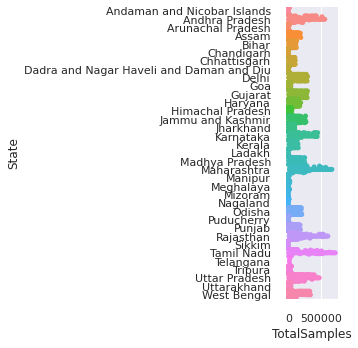

In [8]:
sns.set(style="darkgrid")
src2 =  pd.read_csv('/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv')
sns.catplot(y="State", x="TotalSamples", kind="swarm", data=src2)

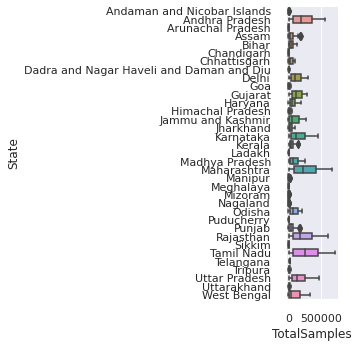

In [9]:
sns.catplot(y="State", x="TotalSamples",kind='box',data=src2) 

## Statewise Testing: Total Samples Vs Negative/Postive Results

<Figure size 576x360 with 0 Axes>

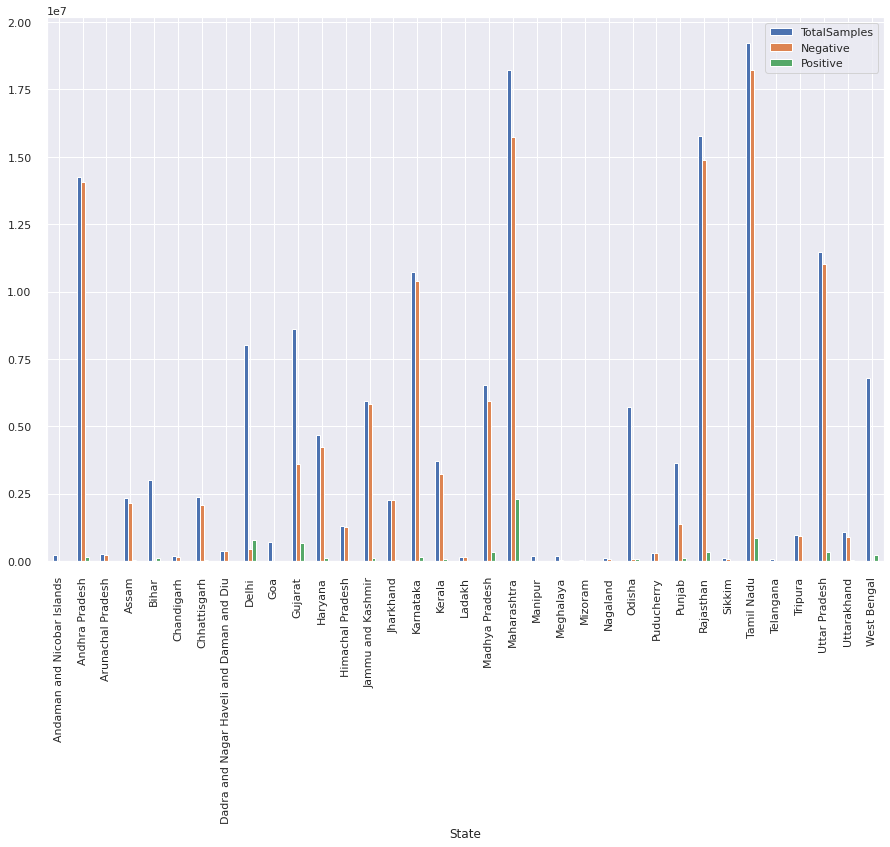

In [10]:
# plot data
#fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
#src2.groupby(['State','Postive']).count()['Positive'].unstack().plot(ax=ax)
#grouped = src2.groupby(['State'])
#total_sample = src2.groupby(['State'])['TotalSamples'].sum()
#pos = src2.groupby(['State'])['Positive'].sum()
#neg = src2.groupby(['State'])['Negative'].sum()

plt.clf() 
src2.groupby('State').sum().plot(kind='bar', figsize=(15,10))

## Infections by Age Group

In [11]:
df = pd.read_csv('/kaggle/input/covid19-in-india/AgeGroupDetails.csv', usecols=['AgeGroup', 'TotalCases'])
#sns.set(style="darkgrid")
#g = sns.relplot(x="AgeGroup", y="TotalCases", kind="line", data=ageGrps)
#plt.bar(df['AgeGroup'], df['TotalCases']) 
#plt.xlabel("AgeGroup") 
#plt.ylabel("TotalCases") 
#plt.xticks(rotation=90)
#plt.show() 

df_d = pd.read_csv('/kaggle/input/covid19-in-india/AgeGroupDetails.csv')
fig = px.bar(df_d[['AgeGroup', 'Percentage']].sort_values('Percentage', ascending=False), 
             x="Percentage", y="AgeGroup", color='AgeGroup',color_discrete_sequence = ex.colors.cyclical.IceFire
              ,title='Infections by age group',orientation='h')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(barmode='stack')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',yaxis_title='Age Group',xaxis_title='Percentages')
fig.update_layout(template = 'plotly_white')
fig.show()

# Plot Daily Growth of Cases 

In [12]:
df_temp = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
temp = df_temp.groupby('Date')['Confirmed', 'Deaths', 'Cured'].sum().reset_index()
fig = px.scatter(temp, x="Date", y="Confirmed", color="Confirmed",
                 size='Confirmed', hover_data=['Confirmed'],
                 color_discrete_sequence = px.colors.qualitative.G10)
fig.update_layout(title_text='Daily Trend',
                  plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

# Prediction

My motivation stems from
YouTube Video : ***Exponential growth and epidemics***
By 3blue1Brown

https://www.youtube.com/watch?v=Kas0tIxDvrg

In [13]:
#importing libraries
import scipy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Fit a Logistic Curve on Confirmed Cases in India 

In [14]:
covid_19_India=pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
date_wise_data = covid_19_India[['State/UnionTerritory',"Date","Confirmed","Deaths","Cured"]]
date_wise_data['Date'] = date_wise_data['Date'].apply(pd.to_datetime, dayfirst=True)
date_wise_data = date_wise_data.groupby(["Date"]).sum().reset_index()
def formatted_text(string):
    display(Markdown(string))
 
import scipy
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0))) + 1
d_df = date_wise_data.copy()
p0 = (0,0,0)
def plot_logistic_fit_data(d_df, title, p0=p0):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    d_df['x'] = np.arange(len(d_df)) + 1
    d_df['y'] = d_df['Confirmed']

    x = d_df['x']
    y = d_df['y']

    c2 = scipy.optimize.curve_fit(logistic,  x,  y,  p0=p0 )
    #y = logistic(x, L, k, x0)
    popt, pcov = c2

    x = range(1,d_df.shape[0] + int(popt[2]))
    y_fit = logistic(x, *popt)
    
    p_df = pd.DataFrame()
    p_df['x'] = x
    p_df['y'] = y_fit.astype(int)
    
    print("Predicted L (the maximum number of confirmed cases): " + str(int(popt[0])))
    print("Predicted k (growth rate): " + str(float(popt[1])))
    print("Predicted x0 (the day of the inflexion): " + str(int(popt[2])) + "")

    x0 = int(popt[2])
    
    traceC = go.Scatter(
        x=d_df['x'], y=d_df['y'],
        name="Confirmed",
        marker=dict(color="Red"),
        mode = "markers+lines",
        text=d_df['Confirmed'],
    )

    traceP = go.Scatter(
        x=p_df['x'], y=p_df['y'],
        name="Predicted",
        marker=dict(color="blue"),
        mode = "lines",
        text=p_df['y'],
    )
    
    trace_x0 = go.Scatter(
        x = [x0, x0], y = [0, p_df.loc[p_df['x']==x0,'y'].values[0]],
        name = "X0 - Inflexion point",
        marker=dict(color="black"),
        mode = "lines",
        text = "X0 - Inflexion point"
    )

    data = [traceC, traceP, trace_x0]

    layout = dict(title = 'Logistic Curve Projection on Confirmed Cases in India',
          xaxis = dict(title = 'Day since 30 January 2020', showticklabels=True), 
          yaxis = dict(title = 'Number of cases'),
          hovermode = 'closest',plot_bgcolor='rgb(275, 270, 273)'
         )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='covid-logistic-forecast')
    
L = 250000
k = 0.25
x0 = 100
p0 = (L, k, x0)
plot_logistic_fit_data(d_df, 'India') 


Predicted L (the maximum number of confirmed cases): 639823
Predicted k (growth rate): 0.06431087821609964
Predicted x0 (the day of the inflexion): 137


### Fit a Logistic Curve on Cured Cases in India 

In [15]:
covid_19_India = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
date_wise_data = covid_19_India[['State/UnionTerritory',"Date","Confirmed","Deaths","Cured"]]
date_wise_data['Date'] = date_wise_data['Date'].apply(pd.to_datetime, dayfirst=True)
date_wise_data = date_wise_data.groupby(["Date"]).sum().reset_index()
def formatted_text(string):
    display(Markdown(string))
 
import scipy
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0))) + 1
d_df = date_wise_data.copy()
p0 = (0,0,0)
def plot_logistic_fit_data(d_df, title, p0=p0):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    d_df['x'] = np.arange(len(d_df)) + 1
    d_df['y'] = d_df['Cured']

    x = d_df['x']
    y = d_df['y']

    c2 = scipy.optimize.curve_fit(logistic,  x,  y,  p0=p0 )
    #y = logistic(x, L, k, x0)
    popt, pcov = c2

    x = range(1,d_df.shape[0] + int(popt[2]))
    y_fit = logistic(x, *popt)
    
    p_df = pd.DataFrame()
    p_df['x'] = x
    p_df['y'] = y_fit.astype(int)
    
    print("Predicted L (the maximum number of Cured cases): " + str(int(popt[0])))
    print("Predicted k (growth rate): " + str(float(popt[1])))
    print("Predicted x0 (the day of the inflexion): " + str(int(popt[2])) + "")

    x0 = int(popt[2])
    
    traceC = go.Scatter(
        x=d_df['x'], y=d_df['y'],
        name="Cured",
        marker=dict(color="Red"),
        mode = "markers+lines",
        text=d_df['Cured'],
    )

    traceP = go.Scatter(
        x=p_df['x'], y=p_df['y'],
        name="Predicted",
        marker=dict(color="blue"),
        mode = "lines",
        text=p_df['y'],
    )
    
    trace_x0 = go.Scatter(
        x = [x0, x0], y = [0, p_df.loc[p_df['x']==x0,'y'].values[0]],
        name = "X0 - Inflexion point",
        marker=dict(color="black"),
        mode = "lines",
        text = "X0 - Inflexion point"
    )

    data = [traceC, traceP, trace_x0]

    layout = dict(title = 'Logistic Curve Projection on Cured Covid Cases in India',
          xaxis = dict(title = 'Day since 30 January 2020,', showticklabels=True), 
          yaxis = dict(title = 'Number of cases'),
          hovermode = 'closest',plot_bgcolor='rgb(275, 270, 273)'
         )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='covid-logistic-forecast')
    
L = 250000
k = 0.25
x0 = 100
p0 = (L, k, x0)
plot_logistic_fit_data(d_df, 'India')

Predicted L (the maximum number of Cured cases): 268191
Predicted k (growth rate): 0.08409091205089145
Predicted x0 (the day of the inflexion): 132


### Fit a Logistic Curve on Covid Death Cases in India 

In [16]:
covid_19_India = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
date_wise_data = covid_19_India[['State/UnionTerritory',"Date","Confirmed","Deaths","Cured"]]
date_wise_data['Date'] = date_wise_data['Date'].apply(pd.to_datetime, dayfirst=True)
date_wise_data = date_wise_data.groupby(["Date"]).sum().reset_index()
def formatted_text(string):
    display(Markdown(string))
 
import scipy
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0))) + 1
d_df = date_wise_data.copy()
p0 = (0,0,0)
def plot_logistic_fit_data(d_df, title, p0=p0):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    d_df['x'] = np.arange(len(d_df)) + 1
    d_df['y'] = d_df['Deaths']

    x = d_df['x']
    y = d_df['y']

    c2 = scipy.optimize.curve_fit(logistic,  x,  y,  p0=p0 )
    #y = logistic(x, L, k, x0)
    popt, pcov = c2

    x = range(1,d_df.shape[0] + int(popt[2]))
    y_fit = logistic(x, *popt)
    
    p_df = pd.DataFrame()
    p_df['x'] = x
    p_df['y'] = y_fit.astype(int)
    
    print("Predicted L (the maximum number of Cured cases): " + str(int(popt[0])))
    print("Predicted k (growth rate): " + str(float(popt[1])))
    print("Predicted x0 (the day of the inflexion): " + str(int(popt[2])) + "")

    x0 = int(popt[2])
    
    traceC = go.Scatter(
        x=d_df['x'], y=d_df['y'],
        name="Deaths",
        marker=dict(color="Red"),
        mode = "markers+lines",
        text=d_df['Cured'],
    )

    traceP = go.Scatter(
        x=p_df['x'], y=p_df['y'],
        name="Predicted",
        marker=dict(color="blue"),
        mode = "lines",
        text=p_df['y'],
    )
    
    trace_x0 = go.Scatter(
        x = [x0, x0], y = [0, p_df.loc[p_df['x']==x0,'y'].values[0]],
        name = "X0 - Inflexion point",
        marker=dict(color="black"),
        mode = "lines",
        text = "X0 - Inflexion point"
    )

    data = [traceC, traceP, trace_x0]

    layout = dict(title = 'Logistic Curve Projection on Covid Deaths in India',
          xaxis = dict(title = 'Day since 30 January 2020', showticklabels=True), 
          yaxis = dict(title = 'Number of cases'),
          hovermode = 'closest',plot_bgcolor='rgb(275, 270, 273)'
         )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='covid-logistic-forecast')
    
L = 10000
k = 0.25
x0 = 100
p0 = (L, k, x0)
plot_logistic_fit_data(d_df, 'India')

Predicted L (the maximum number of Cured cases): 20201
Predicted k (growth rate): 0.05850263179235824
Predicted x0 (the day of the inflexion): 140


-

### Thanks for taking time to review the EDA and predictions. Appreciate your feedback.